# Graphs in Data Structures and Algorithms

## Introduction to Graphs

A **graph** is a non-linear data structure consisting of vertices (nodes) and edges that connect these vertices. Graphs are used to represent networks, relationships, and connections between objects.

### Graph Terminology

- **Vertex/Node**: A fundamental unit of a graph
- **Edge**: Connection between two vertices
- **Adjacent Vertices**: Two vertices connected by an edge
- **Degree**: Number of edges connected to a vertex
- **Path**: Sequence of vertices connected by edges
- **Cycle**: Path that starts and ends at the same vertex
- **Connected Graph**: Graph where there's a path between every pair of vertices
- **Weighted Graph**: Graph where edges have associated weights/costs
- **Directed Graph (Digraph)**: Edges have direction
- **Undirected Graph**: Edges have no direction

## Graph Representations

### 1. Adjacency Matrix
- 2D array where `matrix[i][j] = 1` if edge exists between vertex i and j
- **Space Complexity**: O(V²)
- **Edge Lookup**: O(1)
- **Good for**: Dense graphs

### 2. Adjacency List
- Array of lists where each index represents a vertex and contains its neighbors
- **Space Complexity**: O(V + E)
- **Edge Lookup**: O(degree of vertex)
- **Good for**: Sparse graphs (most common)

### 3. Edge List
- List of all edges as pairs of vertices
- **Space Complexity**: O(E)
- **Good for**: Storing graph information

## Graph Traversal Algorithms

### 1. Breadth-First Search (BFS)
- Explores graph level by level using a queue
- **Time Complexity**: O(V + E)
- **Space Complexity**: O(V)
- **Applications**: Shortest path in unweighted graphs, level-order traversal

### 2. Depth-First Search (DFS)
- Explores as deep as possible before backtracking using recursion/stack
- **Time Complexity**: O(V + E)
- **Space Complexity**: O(V)
- **Applications**: Cycle detection, topological sorting, connected components

## Shortest Path Algorithms

### 1. Dijkstra's Algorithm
- Finds shortest path from source to all vertices in weighted graph (non-negative weights)
- **Time Complexity**: O((V + E) log V) with min-heap
- **Space Complexity**: O(V)

### 2. Bellman-Ford Algorithm
- Handles negative weights, detects negative cycles
- **Time Complexity**: O(V × E)
- **Space Complexity**: O(V)

### 3. Floyd-Warshall Algorithm
- All-pairs shortest path
- **Time Complexity**: O(V³)
- **Space Complexity**: O(V²)

### 4. A* Algorithm
- Heuristic-based pathfinding
- **Time Complexity**: O(E) in best case, depends on heuristic
- **Space Complexity**: O(V)

## Minimum Spanning Tree (MST)

### 1. Prim's Algorithm
- Greedy algorithm, grows MST one vertex at a time
- **Time Complexity**: O(E log V) with min-heap
- **Space Complexity**: O(V)

### 2. Kruskal's Algorithm
- Greedy algorithm, sorts edges and adds them if no cycle
- **Time Complexity**: O(E log E) or O(E log V)
- **Space Complexity**: O(V) for Union-Find

## Advanced Graph Algorithms

### 1. Topological Sort
- Linear ordering of directed acyclic graph (DAG)
- **Time Complexity**: O(V + E)
- **Space Complexity**: O(V)
- **Methods**: DFS-based, Kahn's Algorithm (BFS-based)

### 2. Cycle Detection
- **Undirected**: DFS with parent tracking - O(V + E)
- **Directed**: DFS with recursion stack - O(V + E)

### 3. Strongly Connected Components (SCC)
- **Kosaraju's Algorithm**: O(V + E)
- **Tarjan's Algorithm**: O(V + E)

### 4. Bridges and Articulation Points
- **Time Complexity**: O(V + E)
- Uses DFS with discovery and low values

## Graph Coloring
- Assign colors to vertices such that no adjacent vertices have same color
- **Time Complexity**: O(V + E) for greedy approach
- **NP-Complete** for optimal solution

## Network Flow

### 1. Ford-Fulkerson Algorithm
- Maximum flow in a flow network
- **Time Complexity**: O(E × max_flow)

### 2. Edmonds-Karp Algorithm
- BFS implementation of Ford-Fulkerson
- **Time Complexity**: O(V × E²)

## Common Time & Space Complexities Summary

| Operation/Algorithm | Time Complexity | Space Complexity |
|---------------------|-----------------|------------------|
| BFS | O(V + E) | O(V) |
| DFS | O(V + E) | O(V) |
| Dijkstra's | O((V + E) log V) | O(V) |
| Bellman-Ford | O(V × E) | O(V) |
| Floyd-Warshall | O(V³) | O(V²) |
| Prim's | O(E log V) | O(V) |
| Kruskal's | O(E log E) | O(V) |
| Topological Sort | O(V + E) | O(V) |
| Tarjan's SCC | O(V + E) | O(V) |

## Python Implementation Considerations

- Use `collections.defaultdict(list)` for adjacency lists
- Use `collections.deque` for BFS queue
- Use `heapq` module for priority queues (Dijkstra's, Prim's)
- Use recursion or explicit stack for DFS
- Implement Union-Find for Kruskal's algorithm

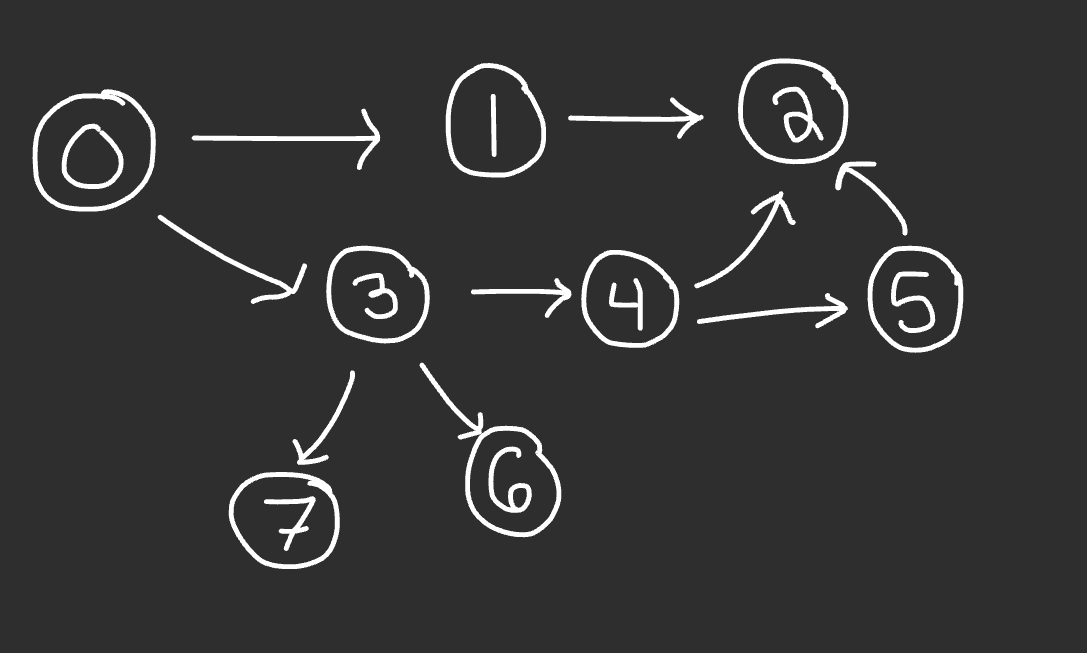

In [11]:
# Array of edges - Directed graph
A = [[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]
# Number of vertices
V = 8

In [12]:
# Array of edges to adjacency matrix
M = []
for i in range(V):
    M.append([0] * V)

for u, v in A:
    M[u][v] = 1
# If undirected graph, uncomment the following line
    # M[v][u] = 1
M

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [13]:
# Array of edges to adjacency list
from collections import defaultdict
L = defaultdict(list)
for u, v in A:
    L[u].append(v)

L

defaultdict(list, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [2, 5], 5: [2]})

In [14]:
# DFS with recursion - Time: O(V + E), Space: O(V)
visited = [False] * V
def dfs_recursive(node):
    visited[node] = True
    print(node)
    for neighbor in L[node]:
        if not visited[neighbor]:
            dfs_recursive(neighbor)

dfs_recursive(0)

0
1
2
3
4
5
6
7


In [15]:
# DFS with iteration - Time: O(V + E), Space: O(V)

def dfs_iterative(start):
    stack = [start]
    visited = [False] * V
    visited[start] = True
    while stack:
        node = stack.pop()
        print(node)
        for neighbor in L[node]:
            if not visited[neighbor]:
                visited[neighbor] = True
                stack.append(neighbor)

dfs_iterative(0)

0
3
7
6
4
5
2
1


In [16]:
# BFS (Queue) - Time: O(V + E), Space: O(V)
from collections import deque

def bfs(start):
    q = deque([start])
    visited = [False] * V
    visited[start] = True
    while q:
        node = q.popleft()
        print(node)
        for neighbor in L[node]:
            if not visited[neighbor]:
                visited[neighbor] = True
                q.append(neighbor)

bfs(0)

0
1
3
2
4
6
7
5


In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.neighbors = []
    
    def __str__(self):
        return f"Node({self.value})"

    def display(self):
        print(f"Node {self.value} with neighbors {[neighbor.value for neighbor in self.neighbors]}")

A = Node(1)
B = Node(2)
C = Node(3)
D = Node(4)

A.neighbors.append(B)
A.neighbors.append(C)
B.neighbors.append(D)
C.neighbors.append(D)

A.display()
B.display()
C.display()
D.display()

Node 1 with neighbors [2, 3]
Node 2 with neighbors [4]
Node 3 with neighbors []
Node 4 with neighbors []
